In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

import pandas as pd

In [2]:
model_ridge = joblib.load("../models/model_ridge.joblib")
model_lasso = joblib.load("../models/model_lasso.joblib")
model_elasticnet = joblib.load("../models/model_elasticnet.joblib")

X_test_scaled = np.load("../models/X_test_scaled.npy")
y_test = np.load("../models/y_test.npy")

/home/lo0py/Workspace/DGX2025/RevJour/energy-consumption-forecast/.venv/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Lasso from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
X_test_scaled[:5]

array([[-1.28062656, -0.94750337,  0.83009831,  1.2683758 , -0.69388867,
         1.43002892, -0.72830954,  1.01142894, -1.01142894],
       [-1.29340604,  0.39628421,  0.12081924,  1.74374182,  1.44115338,
        -0.69928656, -0.72830954,  1.01142894, -1.01142894],
       [ 1.55895833, -0.49957417, -0.58845983, -0.84326495,  1.44115338,
        -0.69928656, -0.72830954,  1.01142894, -1.01142894],
       [ 0.37159697, -1.56771302, -0.73031564, -1.74321605, -0.69388867,
        -0.69928656,  1.37304257, -0.9887002 ,  0.9887002 ],
       [-0.2058093 ,  0.32737203,  1.53937738,  1.41084454, -0.69388867,
        -0.69928656,  1.37304257, -0.9887002 ,  0.9887002 ]])

In [4]:
y_test[:5]

array([3708.08, 3372.2 , 5023.85, 3314.91, 3984.2 ])

In [5]:
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_lasso = model_lasso.predict(X_test_scaled)
y_pred_elasticnet = model_elasticnet.predict(X_test_scaled)

In [6]:
res = pd.DataFrame({"Actual": y_test, "Pred_ridge": y_pred_ridge, "Pred_lasso": y_pred_lasso, "pred_elasticnet": y_pred_elasticnet})
res.head(10)

,Actual,Pred_ridge,Pred_lasso,pred_elasticnet
0,3708.08,3708.101799,3708.099997,3708.102589
1,3372.20,3372.200859,3372.205389,3372.209258
2,5023.85,5023.849895,5023.849762,5023.848771
3,3314.91,3314.898691,3314.902457,3314.902612
4,3984.20,3984.199376,3984.201346,3984.198619
5,4516.02,4516.000118,4516.001475,4516.002451
6,2728.63,2728.649303,2728.654673,2728.657099
7,4374.33,4374.347999,4374.351641,4374.350606
8,5763.85,5763.849273,5763.842719,5763.835587
9,3796.71,3796.700770,3796.704262,3796.709070


In [7]:
def eval_score(y_pred):
    return (
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred),
    )

In [8]:
mae_ridge, mse_ridge, r2_ridge =  eval_score(y_pred_ridge)
mae_lasso, mse_lasso, r2_lasso =  eval_score(y_pred_lasso)
mae_elastic, mse_elastic, r2_elastic =  eval_score(y_pred_elasticnet)

In [9]:
mae_ridge, mse_ridge, r2_ridge

(0.011976068441679838, 0.0001990174772646771, 0.9999999997660297)

In [10]:
mae_lasso, mse_lasso, r2_lasso

(0.012374608015418495, 0.00020383632994371923, 0.9999999997603646)

In [11]:
mae_elastic, mse_elastic, r2_elastic

(0.012957403253751016, 0.0002259454430833031, 0.9999999997343725)

In [12]:
def plotbar(model_name, metrics, values):
    plt.bar(metrics, values)
    plt.xticks(rotation=45)
    plt.title(model_name)
    plt.ylabel("Score")
    
    for i, v in enumerate(values):
        plt.text(i, v, f"{v:.5f}", ha='center')

    plt.show()

## MAE Eval

In [13]:
metrics = ["Ridge", "Lasso", "ElasticNet"]

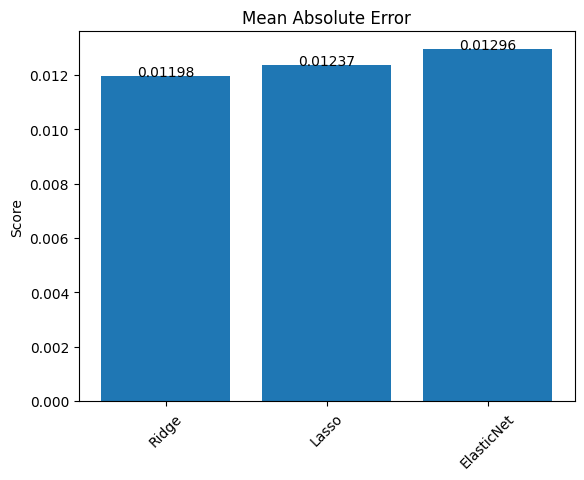

In [14]:
plotbar("Mean Absolute Error", metrics, [mae_ridge, mae_lasso, mae_elastic])

## MSE Eval

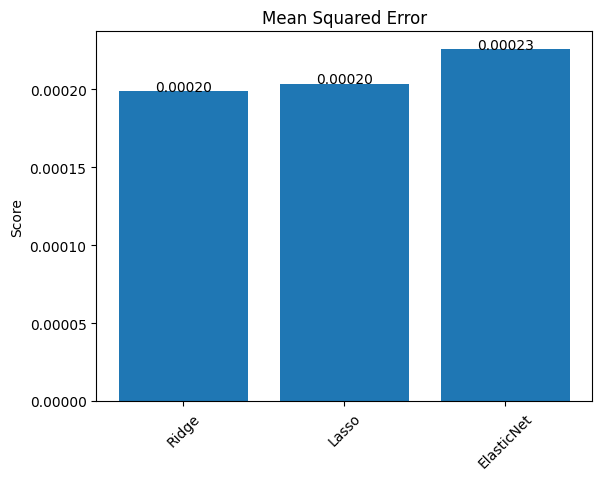

In [15]:
plotbar("Mean Squared Error", metrics, [mse_ridge, mse_lasso, mse_elastic])

## R Squared

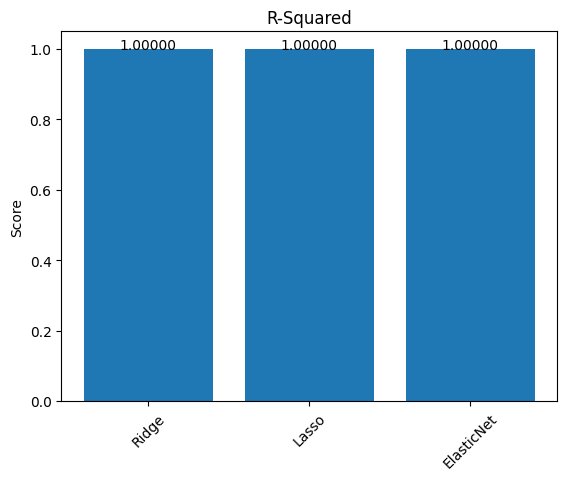

In [16]:
plotbar("R-Squared", metrics, [r2_ridge, r2_lasso, r2_elastic])